# S5P data analysis

This notebook will walk us trough the steps to acces, analyze and visualize S5P data using mwcs. 

### Access to single products

This section will show you how to retrieve S5P data for a specific time and plot it

The first step is to import all necessary packages

In [1]:
import geopandas as gpd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import adampy as adam

In order to retrieve an image we have to define the collection and time range and call the function we just created. We have 6 different S5P collections available, uncheck the one you want to use:

In [3]:
#collection = 'vr_S5P_RPROOFFLNRTI_L2_AER_AI_PRODUCT_AEROSOL_INDEX'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CH4_PRODUCT_METHANE_MIXING_RATIO'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CO_PRODUCT_CARBONMONOXIDE_TOTAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_O3_PRODUCT_OZONE_TOTAL_VERTICAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_SO2_PRODUCT_SULFURDIOXIDE_TOTAL_VERTICAL_COLUMN'
collection = 'vr_S5P_RPROOFFLNRTI_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN'

time_t = '2019-08-05T12:00:00,2019-08-05T12:59:59'


max_lat = 49.1406070703
min_lat = 46.1830670622

max_long = 17.9297047816
min_long = 9.5332850322

#image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t,scale = 1, max_lat = max_lat, min_lat = min_lat, min_long = min_long, max_long = max_long).get_data()

image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t,scale = 0.1).get_data()

In [4]:
metadata

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 1028,
 'height': 485,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:4326'),
 'transform': Affine(0.35000000000000003, 0.0, -179.821981,
        0.0, -0.35000000000000003, 85.997559),
 'offset': 0.0,
 'scale': 1.0}

Then, we open the image and visualize it

Text(0.5, 1.0, 'S5P NO2 in mol/m²')

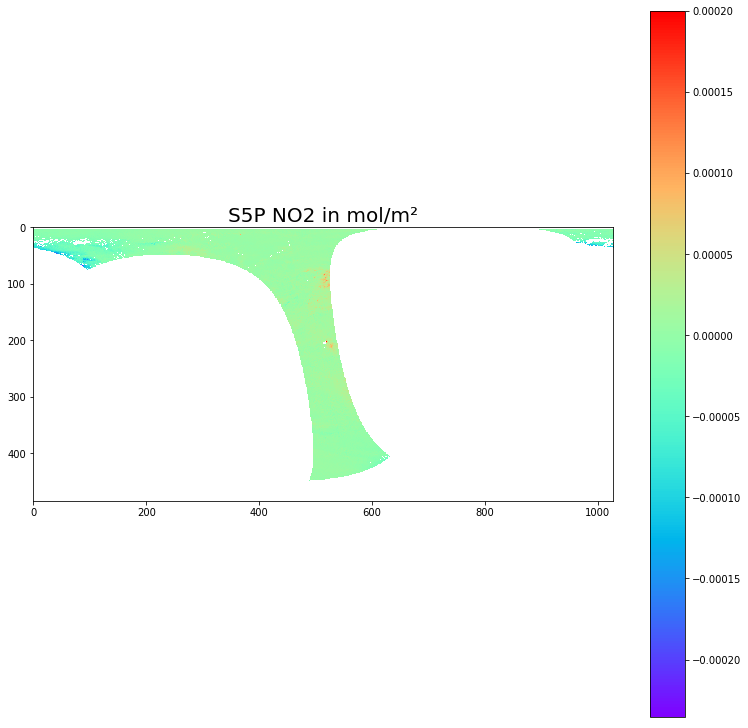

In [8]:
plt.subplots(figsize=(13,13))

plt.imshow(image, cmap = 'rainbow', vmax=0.0002)
plt.colorbar()
plt.title('S5P {} in mol/m²'.format(collection.split('_')[4]), size=20)

As you can see this data looks quite different to the previous dataset (CAMS). This is due to the fact that CAMs is model data and therefore is continuous data whereas S5P is observational data, hence all the different orbits. The image shown above is a daily composite

### Geographic subset

We might be interested in analyzing just a particular area. We can define a new function that takes a bounding box in the query.

As before, let's define the minimum and maximum longitude and latitude, collection and time range, and call the new function

In [9]:
#define bbox
max_lat = 70
min_lat = 20

max_long = 20
min_long = -40

#collection = 'vr_S5P_RPROOFFLNRTI_L2_AER_AI_PRODUCT_AEROSOL_INDEX'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CH4_PRODUCT_METHANE_MIXING_RATIO'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CO_PRODUCT_CARBONMONOXIDE_TOTAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_O3_PRODUCT_OZONE_TOTAL_VERTICAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_SO2_PRODUCT_SULFURDIOXIDE_TOTAL_VERTICAL_COLUMN'
collection = 'vr_S5P_RPROOFFLNRTI_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN'

time_t = '2019-08-05T12:00:00,2019-08-05T12:59:59'

image, metadata = adam.getImage('wcs.top-platform.eu', collection,time_t, min_lat, max_lat, min_long, max_long,fname = 'outputs/s5p_subset.tif').get_data()

Then, we open the image and visualize it

Text(0.5, 1.0, 'S5P NO2 in mol/m²')

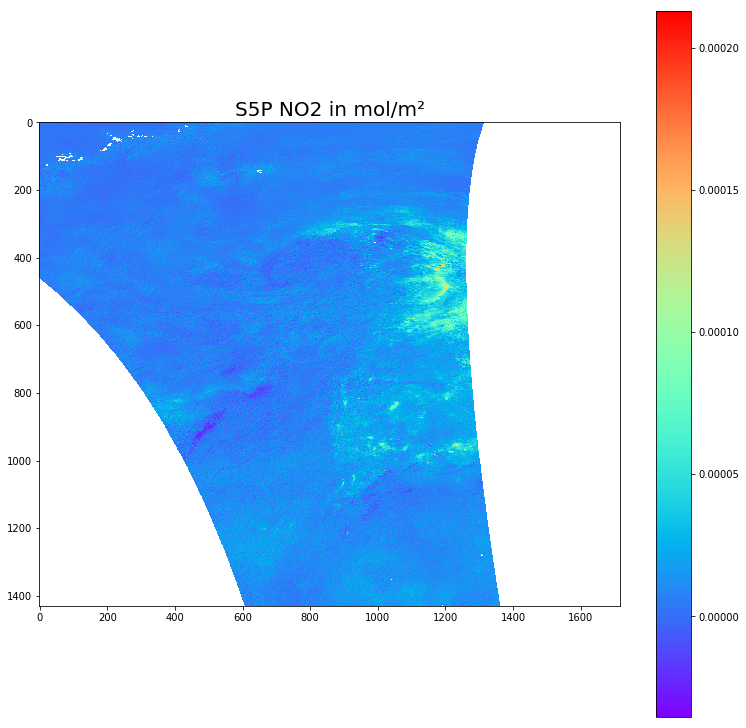

In [10]:
plt.subplots(figsize=(13,13))

plt.imshow(image, cmap='rainbow')
plt.colorbar()
plt.title('S5P {} in mol/m²'.format(collection.split('_')[4]), size=20)


### Single point time series

Another analysis we can do is to retrieve a time series for a specific location. In that case we will define a function that takes only latitude and longitude of one point as arguments

We define the coordinates, collection and time range and call the new function

In [18]:
lat =  48.104841
long =   14.090768

#collection = 'vr_S5P_RPROOFFLNRTI_L2_AER_AI_PRODUCT_AEROSOL_INDEX'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CH4_PRODUCT_METHANE_MIXING_RATIO'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CO_PRODUCT_CARBONMONOXIDE_TOTAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_O3_PRODUCT_OZONE_TOTAL_VERTICAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_SO2_PRODUCT_SULFURDIOXIDE_TOTAL_VERTICAL_COLUMN'
collection = 'vr_S5P_RPROOFFLNRTI_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN'

time_t = '2019-07-01T00:00:00,2019-08-08T23:59:59'

data, times = adam.getTimeSeries('wcs.top-platform.eu', collection,time_t, lat, long).get_data()

https://wcs.top-platform.eu/wcs?service=WCS&Request=GetCoverage&version=2.0.0&subset=unix(2019-07-01T00:00:00,2019-08-08T23:59:59)&format=application/xml&CoverageId=vr_S5P_RPROOFFLNRTI_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN&subset=Lat(48.104841)&subset=Long(14.090768)&filter=false&token=None


Once we got the data we just need to plot it:

Text(0.5, 1.0, 'S5P NO2 in mol/m² for 48.104841,14.090768')

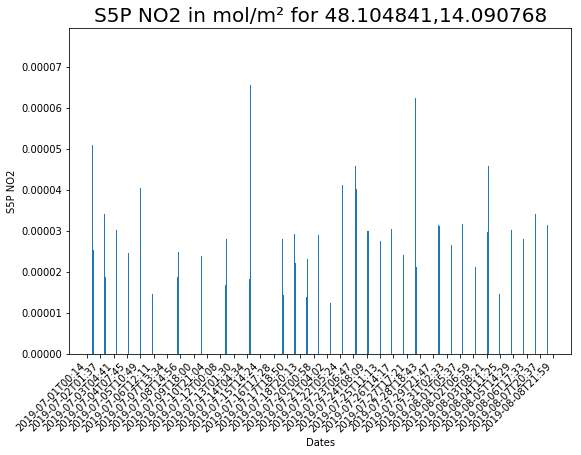

In [19]:
data[data == 9.96921e+36] = 'nan'
data[data < 0] = 'nan'

min_value = 0
max_value = int(len(times))
number_of_steps = 15
l = np.arange(min_value, max_value, number_of_steps)


f, ax = plt.subplots(figsize=(9, 6))
plt.bar(times,data)
#plt.bar(times2, data2)
ax.set(xticks=l, xticklabels=times)
ax.set_xticklabels(labels=times[::15], rotation=45, ha='right')
ax.set(xlabel='Dates', ylabel='S5P {}'.format(collection.split('_')[4]))
plt.title('S5P {} in mol/m² for {},{}'.format(collection.split('_')[4], lat, long), size=20)

### Subset using a polygon

We might want to get data over a specific polygon. In this case we will get NO2 S5P data over the African continent. First, we need a polygon with the shape of the African continent. In this case the file is in geojson format but also KML and SHP can be loaded.

In [20]:
df = gpd.read_file('data/Africa.geojson')
df.head()

,geometry
0,"(POLYGON ((11.737519 -16.692578, 11.738507 -16..."


Let's have a quick look at it

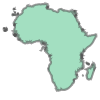

In [21]:
geom = df['geometry'][0]
geom

In this case we define a function that takes the geometry as a whole as argument and masks the results.

As usual, we define the collection and time range, and call the new function

In [22]:
#collection = 'vr_S5P_RPROOFFLNRTI_L2_AER_AI_PRODUCT_AEROSOL_INDEX'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CH4_PRODUCT_METHANE_MIXING_RATIO'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_CO_PRODUCT_CARBONMONOXIDE_TOTAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_O3_PRODUCT_OZONE_TOTAL_VERTICAL_COLUMN'
#collection = 'vr_S5P_RPROOFFLNRTI_L2_SO2_PRODUCT_SULFURDIOXIDE_TOTAL_VERTICAL_COLUMN'
collection = 'vr_S5P_RPROOFFLNRTI_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN'

time_t = '2019-08-05T12:00:00,2019-08-05T12:59:59'

out_image, metadata = adam.getImage('wcs.top-platform.eu', collection, time_t, fname = 'outputs/polygon_s5p_test.tif', geometry = "data/Africa.geojson", masking = True, scale = 0.5).get_data()

And now we can plot the masked image. Look at Johannesburg and Cairo!

Text(0.5, 1.0, 'S5P NO2 in mol/m²')

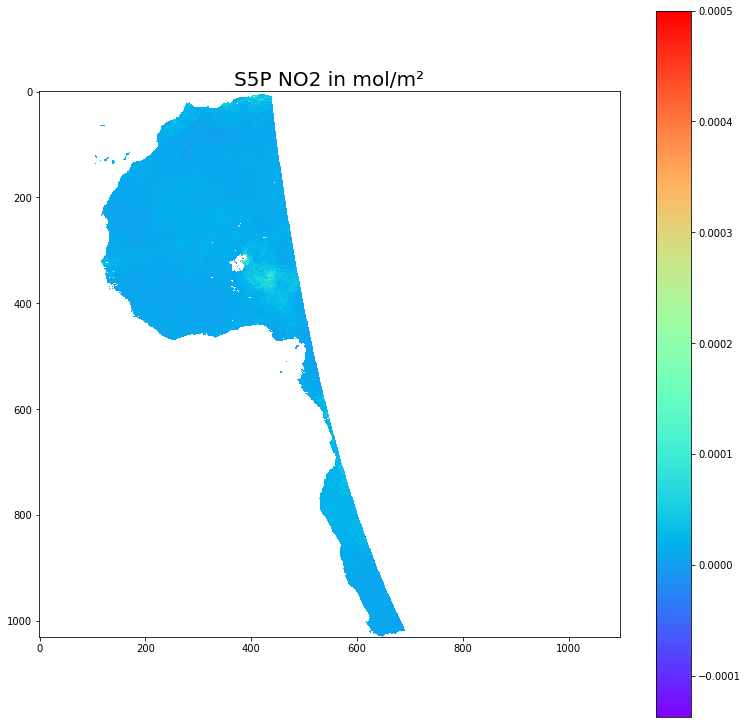

In [25]:
plt.subplots(figsize=(13,13))
plt.imshow(out_image, cmap = 'rainbow', vmax=0.0005)
plt.colorbar()
plt.title('S5P {} in mol/m²'.format(collection.split('_')[4]), size=20)

## Exercise

* Try to use a different collection and adjust the values in the legend (adding vmax = value). You can also use a different time range.
* Get a geojson or shapefile of a country of your choice and run the polygon analysis. You can get it from https://data.opendatasoft.com/explore/dataset/european-union-countries@public/export/